In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from autoencoder.autoencoder import Autoencoder
from autoencoder.activations import *
from autoencoder.lr_scheduler import *
from torchvision.datasets import FashionMNIST
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = FashionMNIST(root='./data', train=True, download=True)

## Data Loading and Preprocessing

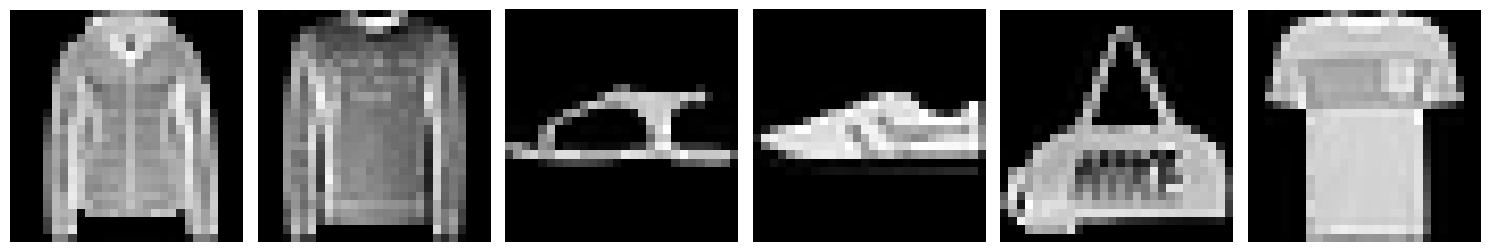

In [3]:
X, y = data.data.numpy(), data.targets.numpy()
# convert to numpy column vectots
X = X.reshape(-1, 784, 1) / 255.0
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42, stratify=y_val_test)

fig, axes = plt.subplots(1, 6, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i+1].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model = Autoencoder(784, 128, 64, 32)
model.train(X_train, X_train, epochs=30, batch_size=100, eta=0.5, l2_param=0.01)

epoch   1/30 : [0.087390]
epoch   2/30 : [0.061691]
epoch   3/30 : [0.043266]
epoch   4/30 : [0.039565]
epoch   5/30 : [0.030086]
epoch   6/30 : [0.027707]
epoch   7/30 : [0.028663]
epoch   8/30 : [0.027456]
epoch   9/30 : [0.025898]
epoch  10/30 : [0.025714]
epoch  11/30 : [0.027182]
epoch  12/30 : [0.024250]
epoch  13/30 : [0.024022]
epoch  14/30 : [0.024145]
epoch  15/30 : [0.025115]
epoch  16/30 : [0.023705]
epoch  17/30 : [0.023049]
epoch  18/30 : [0.023364]
epoch  19/30 : [0.024310]
epoch  20/30 : [0.023045]
epoch  21/30 : [0.025097]
epoch  22/30 : [0.022993]
epoch  23/30 : [0.022348]
epoch  24/30 : [0.021993]
epoch  25/30 : [0.022418]
epoch  26/30 : [0.022856]
epoch  27/30 : [0.022381]
epoch  28/30 : [0.022270]
epoch  29/30 : [0.022014]
epoch  30/30 : [0.021705]


## Experiment 1: Autoencoder (784 → 128 → 64 → 32)

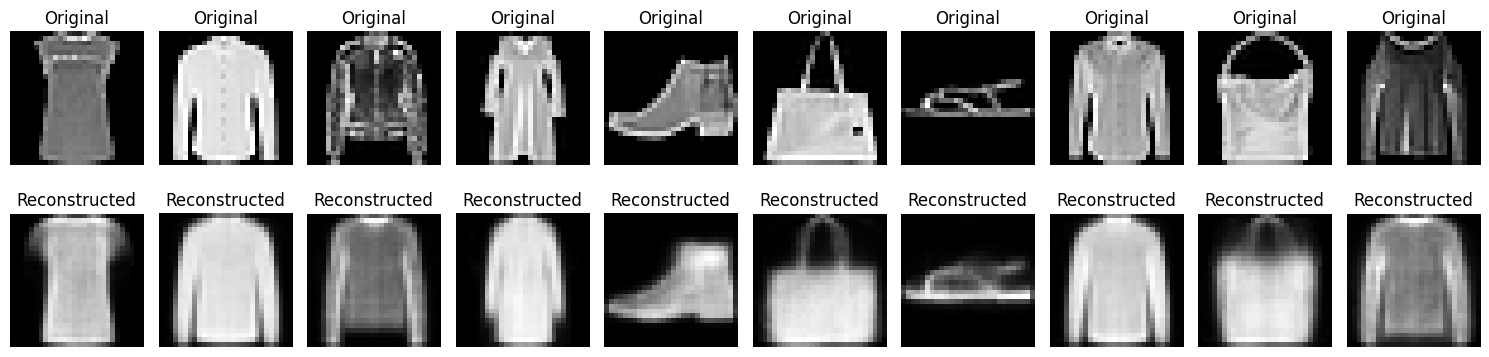

In [62]:
# plot the original and reconstructed images
num_images = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    reconstructed = model.forward(X_test[i].reshape(784, 1)).reshape(28,28)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [60]:
model2 = Autoencoder(784, 64)

model2.train(X_train, X_train, epochs=30, batch_size=100, eta=0.5, l2_param=0.01)

epoch   1/30 : [0.030299]
epoch   2/30 : [0.025498]
epoch   3/30 : [0.022800]
epoch   4/30 : [0.023126]
epoch   5/30 : [0.021676]
epoch   6/30 : [0.022161]
epoch   7/30 : [0.020088]
epoch   8/30 : [0.020376]
epoch   9/30 : [0.019130]
epoch  10/30 : [0.019279]
epoch  11/30 : [0.018815]
epoch  12/30 : [0.019402]
epoch  13/30 : [0.017937]
epoch  14/30 : [0.017961]
epoch  15/30 : [0.017607]
epoch  16/30 : [0.018651]
epoch  17/30 : [0.017762]
epoch  18/30 : [0.019330]
epoch  19/30 : [0.021393]
epoch  20/30 : [0.018782]
epoch  21/30 : [0.018065]
epoch  22/30 : [0.026359]
epoch  23/30 : [0.020559]
epoch  24/30 : [0.017261]
epoch  25/30 : [0.018961]
epoch  26/30 : [0.020739]
epoch  27/30 : [0.017122]
epoch  28/30 : [0.018215]
epoch  29/30 : [0.017504]
epoch  30/30 : [0.018086]


## Experiment 2: Autoencoder (784 → 64)

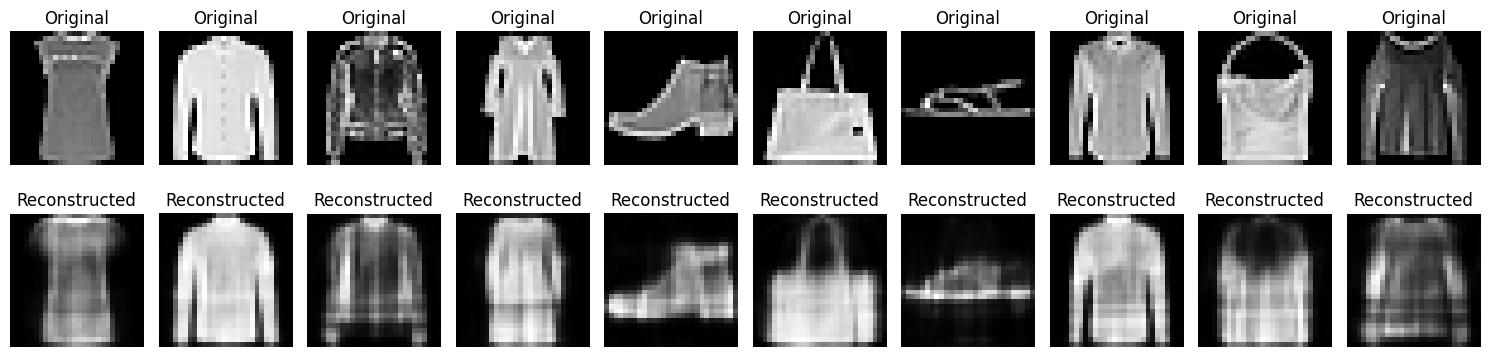

In [63]:
# plot the original and reconstructed images
num_images = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    reconstructed = model2.forward(X_test[i].reshape(784, 1)).reshape(28,28)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
model3 = Autoencoder(784, 128, 64)
model3.train(X_train, X_train, epochs=30, batch_size=100, eta=0.5, l2_param=0.01)

epoch   1/30 : [0.040598]
epoch   2/30 : [0.031276]
epoch   3/30 : [0.027543]
epoch   4/30 : [0.024560]
epoch   5/30 : [0.027375]
epoch   6/30 : [0.030235]
epoch   7/30 : [0.021666]
epoch   8/30 : [0.021639]
epoch   9/30 : [0.020886]
epoch  10/30 : [0.020634]
epoch  11/30 : [0.020008]
epoch  12/30 : [0.018647]
epoch  13/30 : [0.018157]
epoch  14/30 : [0.018685]
epoch  15/30 : [0.017448]
epoch  16/30 : [0.017168]
epoch  17/30 : [0.019450]
epoch  18/30 : [0.017617]
epoch  19/30 : [0.017452]
epoch  20/30 : [0.016237]
epoch  21/30 : [0.016516]
epoch  22/30 : [0.016774]
epoch  23/30 : [0.016629]
epoch  24/30 : [0.015643]
epoch  25/30 : [0.015482]
epoch  26/30 : [0.015886]
epoch  27/30 : [0.016400]
epoch  28/30 : [0.015814]
epoch  29/30 : [0.015726]
epoch  30/30 : [0.015259]


## Experiment 3: Autoencoder (784 → 128 → 64)

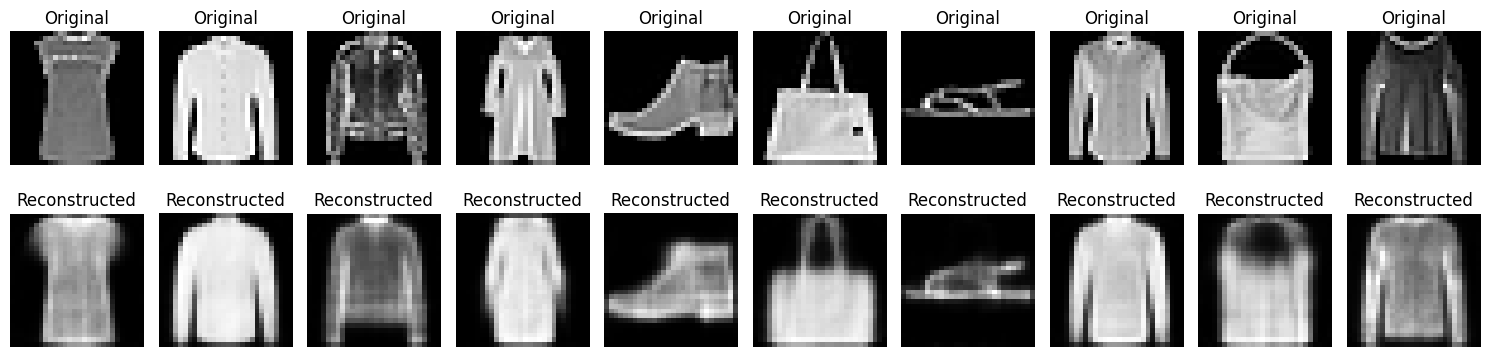

In [5]:
# plot the original and reconstructed images
num_images = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    reconstructed = model3.forward(X_test[i].reshape(784, 1)).reshape(28,28)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

### try trianing the autoencoder with different learning rate schedulers

In [4]:
model4 = Autoencoder(784,128, 64)
model4.train(X_train, X_train, epochs=30, batch_size=100, eta=0.5, l2_param=0.01, lr_scheduler=StepLRScheduler(lr=0.5, step_size=10, gamma=0.5))

epoch   1/30 : [0.040598]
epoch   2/30 : [0.031276]
epoch   3/30 : [0.027543]
epoch   4/30 : [0.024560]
epoch   5/30 : [0.027375]
epoch   6/30 : [0.030235]
epoch   7/30 : [0.021666]
epoch   8/30 : [0.021639]
epoch   9/30 : [0.020886]
epoch  10/30 : [0.020634]
epoch  11/30 : [0.018403]
epoch  12/30 : [0.018060]
epoch  13/30 : [0.017830]
epoch  14/30 : [0.017526]
epoch  15/30 : [0.017624]
epoch  16/30 : [0.017317]
epoch  17/30 : [0.017081]
epoch  18/30 : [0.017277]
epoch  19/30 : [0.017145]
epoch  20/30 : [0.016499]
epoch  21/30 : [0.016216]
epoch  22/30 : [0.016113]
epoch  23/30 : [0.016013]
epoch  24/30 : [0.015922]
epoch  25/30 : [0.015853]
epoch  26/30 : [0.015749]
epoch  27/30 : [0.015702]
epoch  28/30 : [0.015575]
epoch  29/30 : [0.015484]
epoch  30/30 : [0.015521]


## Experiment 4: Step LR Scheduler

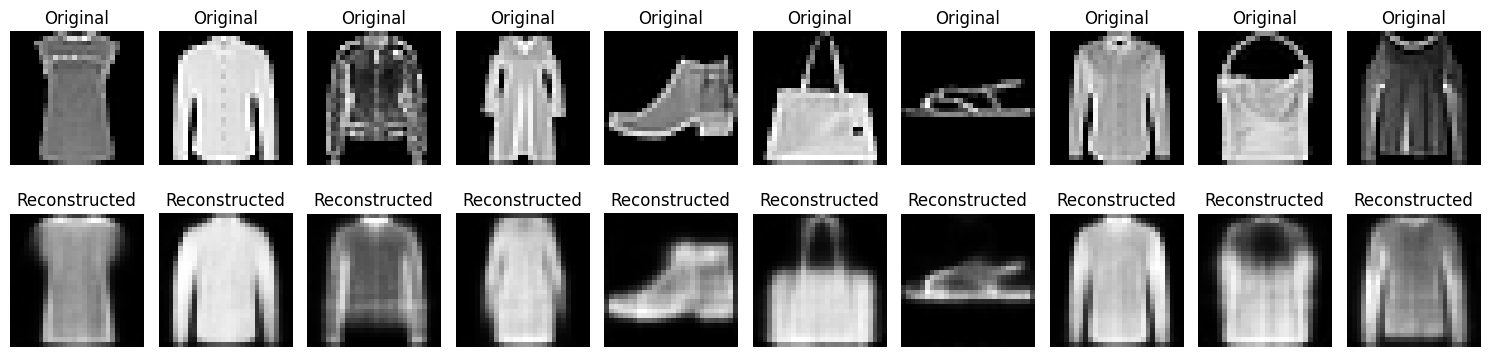

In [6]:
# plot the original and reconstructed images
num_images = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    reconstructed = model4.forward(X_test[i].reshape(784, 1)).reshape(28,28)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
model5 = Autoencoder(784,128, 64)
model5.train(X_train, X_train, epochs=30, batch_size=100, eta=0.5, l2_param=0.01, lr_scheduler=ExponentialLRScheduler(lr=0.5, gamma=0.5))

epoch   1/30 : [0.040598]
epoch   2/30 : [0.032122]
epoch   3/30 : [0.028987]
epoch   4/30 : [0.027470]
epoch   5/30 : [0.027004]
epoch   6/30 : [0.026797]
epoch   7/30 : [0.026691]
epoch   8/30 : [0.026641]
epoch   9/30 : [0.026617]
epoch  10/30 : [0.026605]
epoch  11/30 : [0.026599]
epoch  12/30 : [0.026596]
epoch  13/30 : [0.026595]
epoch  14/30 : [0.026594]
epoch  15/30 : [0.026594]
epoch  16/30 : [0.026593]
epoch  17/30 : [0.026593]
epoch  18/30 : [0.026593]
epoch  19/30 : [0.026593]
epoch  20/30 : [0.026593]
epoch  21/30 : [0.026593]
epoch  22/30 : [0.026593]
epoch  23/30 : [0.026593]
epoch  24/30 : [0.026593]
epoch  25/30 : [0.026593]
epoch  26/30 : [0.026593]
epoch  27/30 : [0.026593]
epoch  28/30 : [0.026593]
epoch  29/30 : [0.026593]
epoch  30/30 : [0.026593]


## Experiment 5: Exponential LR Scheduler

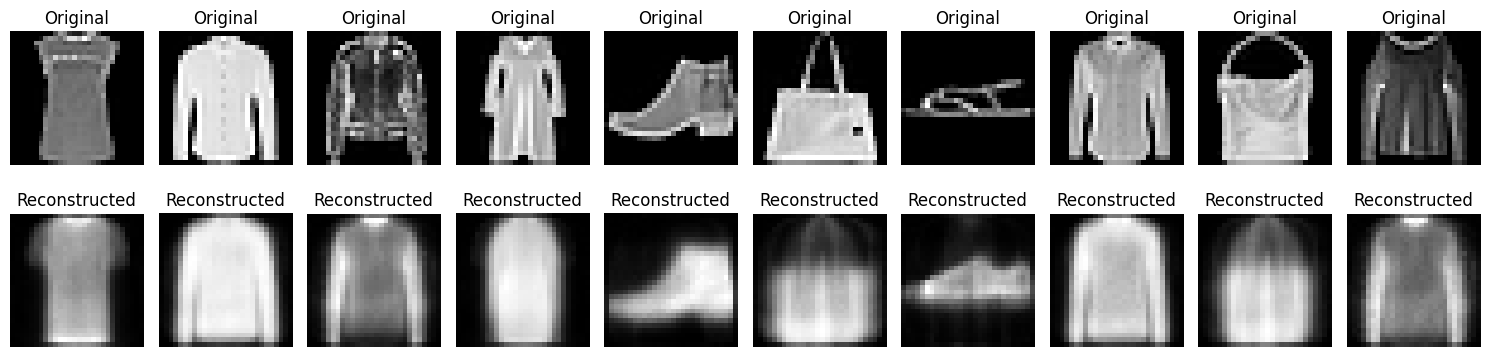

In [9]:
# plot the original and reconstructed images
num_images = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    reconstructed = model5.forward(X_test[i].reshape(784, 1)).reshape(28,28)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [13]:
model6 = Autoencoder(784, 64, activation=TanhActivation())
model6.train(X_train, X_train, epochs=30, batch_size=100, eta=0.1, l2_param=0.01)

epoch   1/30 : [0.083849]
epoch   2/30 : [0.049130]
epoch   3/30 : [0.036459]
epoch   4/30 : [0.032343]
epoch   5/30 : [0.029926]
epoch   6/30 : [0.033303]
epoch   7/30 : [0.035881]
epoch   8/30 : [0.029503]
epoch   9/30 : [0.030385]
epoch  10/30 : [0.028766]
epoch  11/30 : [0.024705]
epoch  12/30 : [0.025396]
epoch  13/30 : [0.026420]
epoch  14/30 : [0.026719]
epoch  15/30 : [0.027875]
epoch  16/30 : [0.026013]
epoch  17/30 : [0.024491]
epoch  18/30 : [0.023336]
epoch  19/30 : [0.024651]
epoch  20/30 : [0.023361]
epoch  21/30 : [0.022903]
epoch  22/30 : [0.019581]
epoch  23/30 : [0.022621]
epoch  24/30 : [0.020195]
epoch  25/30 : [0.022348]
epoch  26/30 : [0.020916]
epoch  27/30 : [0.023910]
epoch  28/30 : [0.021129]
epoch  29/30 : [0.020587]
epoch  30/30 : [0.024566]


## Experiment 6: Tanh Activation Function

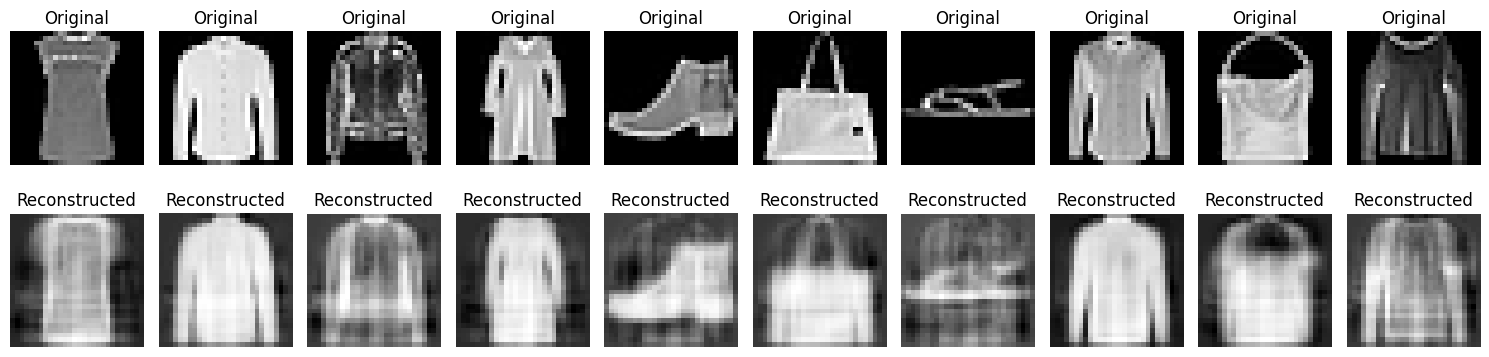

In [14]:
# plot the original and reconstructed images
num_images = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
for i in range(num_images):
    # Original images
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    reconstructed = model6.forward(X_test[i].reshape(784, 1)).reshape(28,28)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()